This is a demonstration of how the toolbox should be used.

In [1]:
from latent import *

Add one mixed track to the project.

In [2]:
import random

p = project.Project(r"example\visualLatent.mat", r"example\audioLatent.mat", 4)
p.load_visual_ae(r"example\VAELargeImage1-4")
p.load_visual_upscaler(r"example\Upscaler1")
p.load_audio_compressor(r"example\AudioAE-4")

for _ in range(3):
    t1 = Track()
    t1.visual_pts = [[(random.random()-0.5)*8 for _v3 in range(4)] for _v2 in range(12)]
    t1.audio_pts = [[(random.random()-0.5)*1.6 for _v3 in range(4)] for _v2 in range(12)]
    t1.odor_pts = [[(random.random()-0.5) for _v3 in range(4)] for _v2 in range(12)]
    
    t1.visual_combinations = [[[0, 1], [1, 1]]]
    t1.audio_combinations = [[[0, 1], [1, 1]]]
    t1.odor_combinations = [[[0, 1], [1, 1]]]

    p.tracks.append(t1)

p.serialize(r'E:\202403\LVremapping-1\t3rmp.sip')

[[ 1.4360526   4.4568577  -4.348968    0.9512681 ]
 [ 1.5972167   4.60637    -3.8651319   1.2214983 ]
 [ 1.6826841   4.666628   -3.3827314   1.5558859 ]
 ...
 [ 0.60684514 -3.2334542   2.2629385   1.6887263 ]
 [ 0.6188119  -3.3027475   2.2855108   1.7183124 ]
 [ 0.5110249  -3.3498633   2.2984684   1.7014551 ]]
[[ 0.604684    0.43825406 -0.34477368 -0.62104696]
 [ 0.85993874  0.7395222  -0.6616463  -0.8065984 ]
 [ 0.58104914  0.2559098  -0.15078019 -0.4884887 ]
 ...
 [ 1.          1.         -1.         -1.        ]
 [ 0.872375    0.77092654 -0.7105449  -0.8391363 ]
 [ 0.8788807   0.77130544 -0.6998646  -0.83110434]]


Visualize visual and audio latent space for aids of track creation.

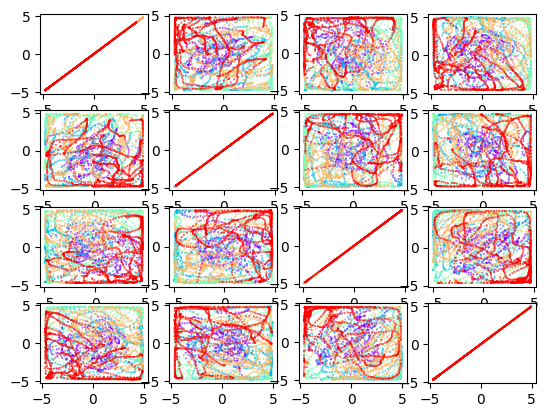

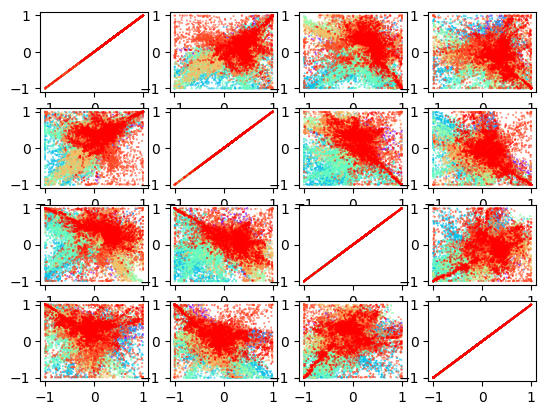

In [3]:
import matplotlib.pyplot as plt

plt.figure()
for dim_id1 in range(4):
    for dim_id2 in range(4):
        plt.subplot(4, 4, dim_id1*4+dim_id2+1)
        plt.scatter(p.visual_latent_space.latent[:, dim_id1], p.visual_latent_space.latent[:, dim_id2], 0.1, 
                    p.visual_latent_space.physics[:, 0], cmap="rainbow")
plt.show()

plt.figure()
for dim_id1 in range(4):
    for dim_id2 in range(4):
        plt.subplot(4, 4, dim_id1*4+dim_id2+1)
        plt.scatter(p.audio_latent_space.latent[:, dim_id1], p.audio_latent_space.latent[:, dim_id2], 0.1, 
                    p.audio_latent_space.physics[:, 0], cmap="rainbow")
plt.show()

In [4]:
p.generate_all(r'E:\202403\LVremapping-1')

KeyboardInterrupt: 

## Demonstration of a session

In [1]:
from latent import *

call_runner(r"E:\202403\LVremapping-1", "va")

SystemExit: 0

D:\anaconda3\envs\dllearn\lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# How to run MNIST test

In [1]:
from latent import *
import random

p = project.Project(r"example\mnistLatent.mat")
p.load_visual_ae(r"example\MNIST4")

print(p.visual_latent_space.get_range())

for _ in range(10):
    t1 = Track()
    t1.visual_pts = [[(random.random()-0.5)*0.9 for _v3 in range(4)] for _v2 in range(12)]
    t1.audio_pts = [[0 for _v3 in range(4)] for _v2 in range(12)]
    t1.odor_pts = [[0 for _v3 in range(4)] for _v2 in range(12)]
    
    t1.visual_combinations = [[[0, 1], [1, 1]]]
    t1.audio_combinations = [[[0, 1], [1, 1]]]
    t1.odor_combinations = [[[0, 1], [1, 1]]]

    p.tracks.append(t1)

p.serialize(r'E:\202403\MNIST\mnist.sip')

[[-0.14378059  0.34844634  0.3469539  -0.2197707 ]
 [ 0.09945029  0.44578722  0.5180246   0.19283849]
 [ 0.30995122 -0.61819893  0.22732694 -0.11496616]
 ...
 [-0.0899472   0.24806935  0.34764755 -0.34030485]
 [ 0.2984355   0.2532135   0.3700517   0.05311929]
 [ 0.33616143  0.49793857 -0.09594028 -0.30676565]]
(-0.95221597, 0.9365416)


In [1]:
from latent import *
p = project.Project()
p.load_from(r'E:\202403\MNIST\mnist.sip')
p.generate_all(r'E:\202403\MNIST', option="mnist")

[[-0.14378059  0.34844634  0.3469539  -0.2197707 ]
 [ 0.09945029  0.44578722  0.5180246   0.19283849]
 [ 0.30995122 -0.61819893  0.22732694 -0.11496616]
 ...
 [-0.0899472   0.24806935  0.34764755 -0.34030485]
 [ 0.2984355   0.2532135   0.3700517   0.05311929]
 [ 0.33616143  0.49793857 -0.09594028 -0.30676565]]


Run the sessions.

In [ ]:
from latent import *

call_runner(r"E:\202403\MNIST", "v")  

# Create audio project files with merely code

In [2]:
import pickle
import numpy as np

file_path = r'E:\202403\LVremapping-1\a\0-0.siw'
with open(file_path, 'rb') as f:
    t = pickle.load(f)

print(t[0].shape)

(1, 4096)


In [ ]:
import pickle
import numpy as np

play_freq = 48000
sample_size = 4096

audio_list = []

# 283.23 - 3505.33

for position_id in range(85, 1880):
    #freq = 700 * ((10 ** (position_id * ((3505.33 - 283.23) / 1000) + 283.23) / 2595) - 1)
    audio_list.append(np.sin(np.arange(0, 2*np.pi*position_id, 2*np.pi*position_id/sample_size))[np.newaxis, :])

file_path = r'E:\202407\ContinuousAudio\a\0-0.siw'
with open(file_path, 'wb') as f:
    pickle.dump(audio_list, f)

In [23]:
print(48000 / 4096 * 1879)
print(48000 / 4096 * 85)

22019.53125
996.09375


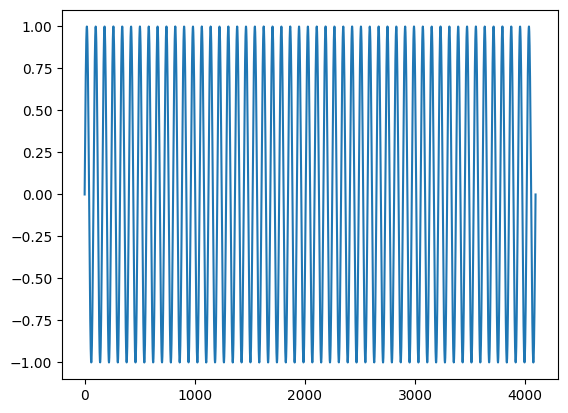

In [5]:
import matplotlib.pyplot as plt
plt.plot(audio_list[1][0])

In [25]:
# generate a blank white video, with the same length as the audio,
# with height = 256, width = 768

import cv2
import numpy as np

blank_image = np.ones((256, 768, 3), np.uint8) * 255

v = cv2.VideoWriter(r'E:\202407\ContinuousAudio\v\0-0.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, (768, 256))
for _ in range(1795):
    v.write(blank_image)
v.release()

Run Project

In [ ]:
from latent import *

call_runner(r"E:\202407\ContinuousAudio", "av")

## ATT-20m

In [ ]:
from latent import *

call_runner(r"E:\202411\packs\1", "v")